======= Training Results =======
d=0.5
correctly_classified:388, misclassified: 7, rejected: 2
TP:140, TN: 248, FP:1, FN: 6, SN/RC:0.96, PR:0.99, SP: 1.0
roc_auc: 0.99
area_pr: 0.99
accuracy: 0.98
rejection rate: 0.01
======= Testing Results =======
d=0.5
correctly_classified:156, misclassified: 4, rejected: 11
TP:55, TN: 101, FP:1, FN: 3, SN/RC:0.95, PR:0.98, SP: 0.99
roc_auc: 0.99
area_pr: 0.99
accuracy: 0.98
rejection rate: 0.06
[['0.00<=Con_M<0.07', '6.80<=Area_SE<96.04', '0.00<=Con_SE<0.07'], ['185.20<=Area_W<863.33', '6.80<=Area_SE<96.04'], ['0.15<=ConP_W<0.19', '0.00<=Con_SE<0.07', '6.80<=Area_SE<96.04'], ['19.57<=Text_M<24.50', '0.00<=Con_SE<0.07', '6.80<=Area_SE<96.04'], ['0.07<=Con_M<0.14', '185.20<=Area_W<863.33', '6.80<=Area_SE<96.04'], ['18.27<=Text_W<24.53', '6.80<=Area_SE<96.04', '0.11<=Rad_SE<0.57'], ['0.17<=Sym_M<0.21', '12.61<=Rad_W<17.30', '6.80<=Area_SE<96.04'], ['0.16<=Sym_W<0.24', '6.80<=Area_SE<96.04'], ['19.57<=Text_M<24.50', '536.42<=Area_M<929.33', '6.80<=Area

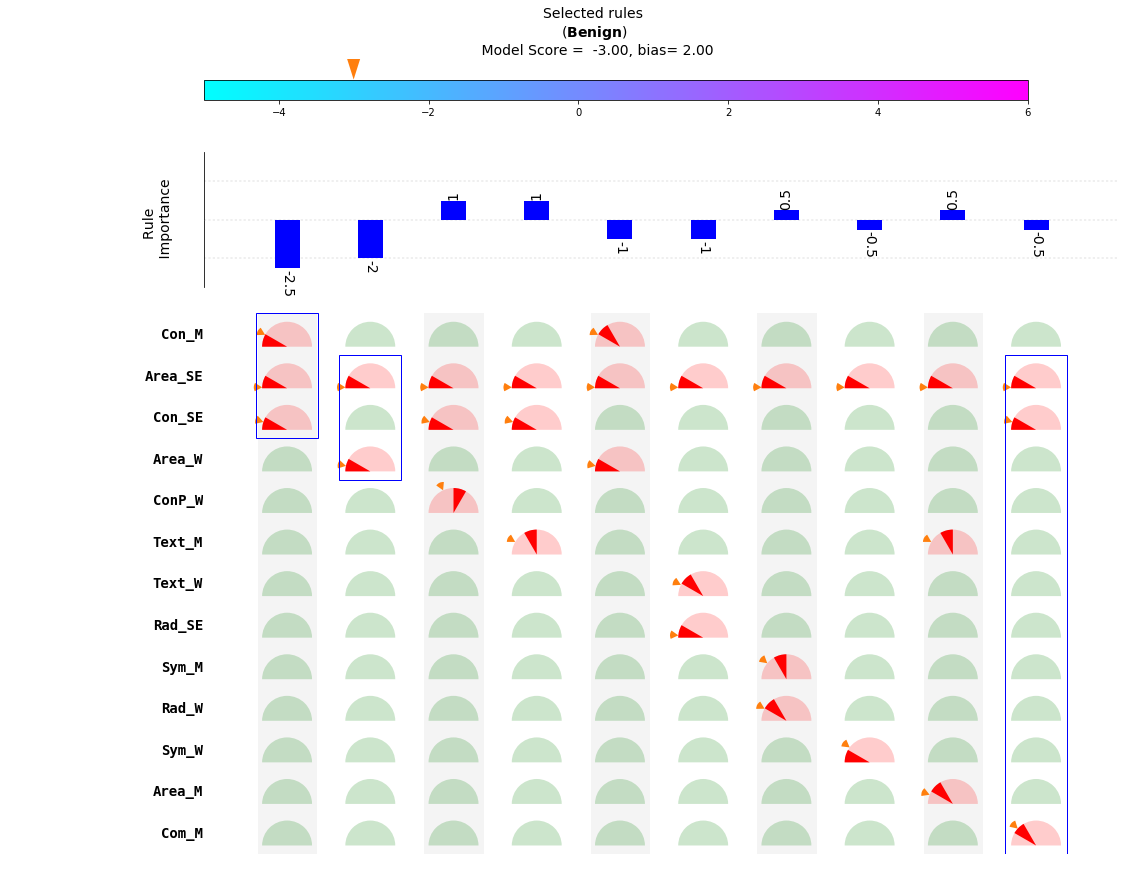

RID: 91550 done ...
Done...


In [4]:
import csv
import sys
import os
import shutil
import argparse
from binarize_Data import *
from reject_boost import *
from filewrite_Actual_Rules_Per_RID import *
from prepare_Visualization import *


data_path="../Data/tmp/"
image_path="../Images/"
DB_path="../Images/DB/"
fname ='input_data_SHIMR'



def create_Dirs(dir_paths):
    for loc_path in dir_paths:
        if not os.path.exists(loc_path):
            os.makedirs(loc_path)

            
def initialize():
    d=0.5
    n_bins=7
    C_POS=1
    C_NEG=1
    size_U=3
    apply_rejection=False
    visualize=True    
    pt_disp=True
    plot_all=False
    f_data="../Data/data.npy"


    # Create temporary directory for storing files generated by 'SHIMR'
    create_Dirs([data_path,image_path])

    return[f_data,d,n_bins,C_POS,C_NEG,size_U,apply_rejection,visualize,pt_disp,plot_all]




def do_Visualization(d,n_bins,data_path,image_path,data_test,X_test_binarized,Feature_dict,rb,class_labels_dict,pt_disp,plot_all):
    # Prepare the file names	
    filename_rules= data_path + 'Rule_List_' + 'nbins_'+ str(n_bins) + '.csv'	
    f_feature_range_array=data_path + 'Feature_range_array.npy'
    f_rule_array=data_path + 'Rule_array.npy'	
    f_Rules_Actual_with_Diag_test= data_path + 'actual_Rules_with_Diag_Per_RID_Test_' + str(d) +'.csv'
    f_itemset=data_path+'itemset_test.csv'
    dir_figure=image_path + 'Interaction_Plot_d_' + str(d) + '/'
    create_Dirs([dir_figure])

    write_Actual_Rules_with_Diag_per_RID(f_Rules_Actual_with_Diag_test, X_test_binarized, data_test, filename_rules, rb.result_train, rb.pred_proba_cal, rb.label_pred_all,f_itemset)
    visualize_main(n_bins,d,rb.predictor,filename_rules,Feature_dict,data_test,f_Rules_Actual_with_Diag_test,dir_figure,class_labels_dict,f_feature_range_array,f_rule_array,pt_disp,plot_all)






def run(f_data,d,n_bins,C_POS,C_NEG,size_U,apply_rejection,visualize,pt_disp,plot_all):		
    data_train, data_test, Feature_dict, class_labels_dict=np.load(f_data)

    #Binarize data	
    X_train_binarized,X_test_binarized=binarize(data_train[:,2:], data_test[:,2:], n_bins, Feature_dict, data_path)

    
    while(d>0):		

        # Instantiate 'reject_boost(SHIMR)'
        rb=reject_boost(d, n_bins, size_U, C_POS, C_NEG, data_path, fname)		

        # Fit SHIMR to train data
        rb.fit(X_train_binarized,data_train[:,1])

        # Apply fitted model on test data
        rb.test(X_test_binarized,data_test[:,1])

        if(visualize):
            do_Visualization(d,n_bins,data_path,image_path,data_test,X_test_binarized,Feature_dict,rb,class_labels_dict,pt_disp,plot_all)


        if(apply_rejection):
            d=round((d-0.005),3)			
        else:
            break

    ### Delete the temporary files ###
    if os.path.exists(data_path):
        shutil.rmtree(data_path)






if __name__=="__main__":	
    f_data,d,n_bins,C_POS,C_NEG,size_U,apply_rejection,visualize,pt_disp,plot_all=initialize()
    run(f_data,d,n_bins,C_POS,C_NEG,size_U,apply_rejection,visualize,pt_disp,plot_all)

    print('Done...')




